In [1]:
import opendatasets as od
od.download_kaggle_dataset(data_dir='./data/', dataset_url='https://www.kaggle.com/danielgrijalvas/movies')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: farjadanalytica
Your Kaggle Key: ········


  0%|                                                                                    | 0.00/424k [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████| 424k/424k [00:00<00:00, 908kB/s]

In [112]:
# importing libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8) # Adjusts the configuration of the plots we will create

# Read in the data 
df = pd.read_csv('./data/movies/movies.csv')

In [9]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [18]:
# Check for missing values

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print(f'{col} - {percent_missing}  %' )

name - 0.0  %
rating - 0.010041731872717789  %
genre - 0.0  %
year - 0.0  %
released - 0.0002608242044861763  %
score - 0.0003912363067292645  %
votes - 0.0003912363067292645  %
director - 0.0  %
writer - 0.0003912363067292645  %
star - 0.00013041210224308815  %
country - 0.0003912363067292645  %
budget - 0.2831246739697444  %
gross - 0.02464788732394366  %
company - 0.002217005738132499  %
runtime - 0.0005216484089723526  %


In [22]:
df.fillna()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [23]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

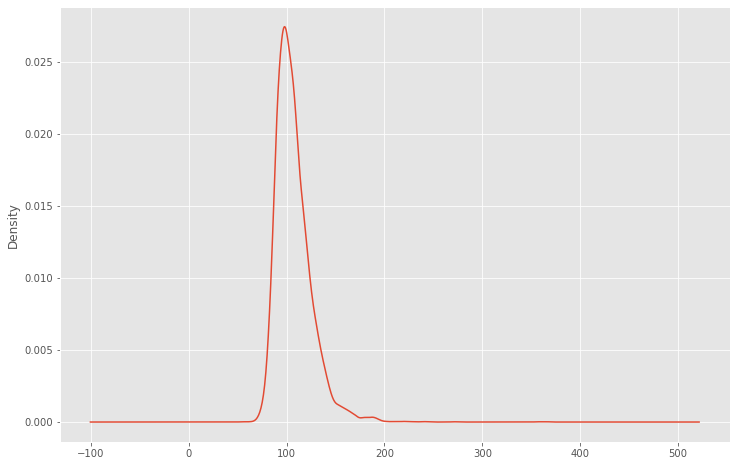

In [41]:
df.runtime.plot.density();

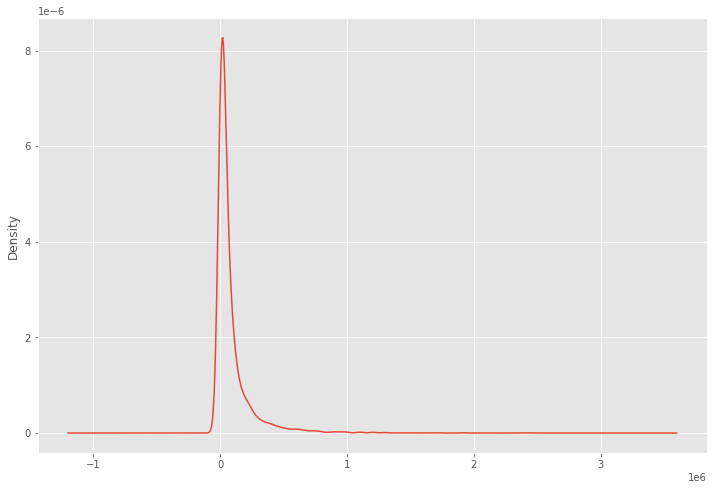

In [42]:
df.votes.plot.density();

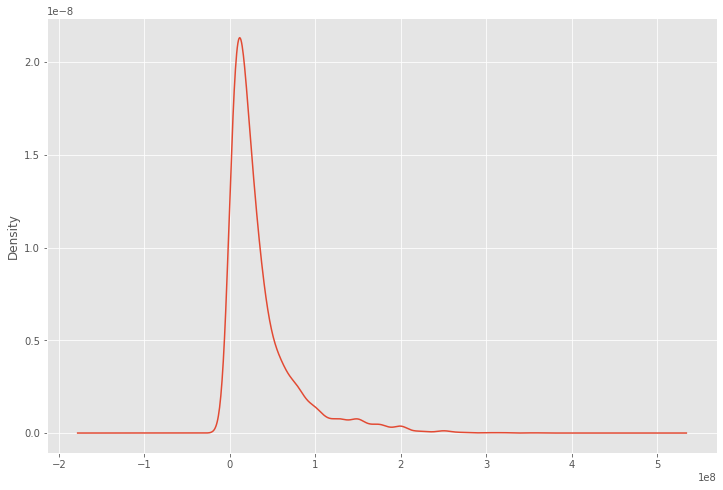

In [44]:
df.budget.plot.density();

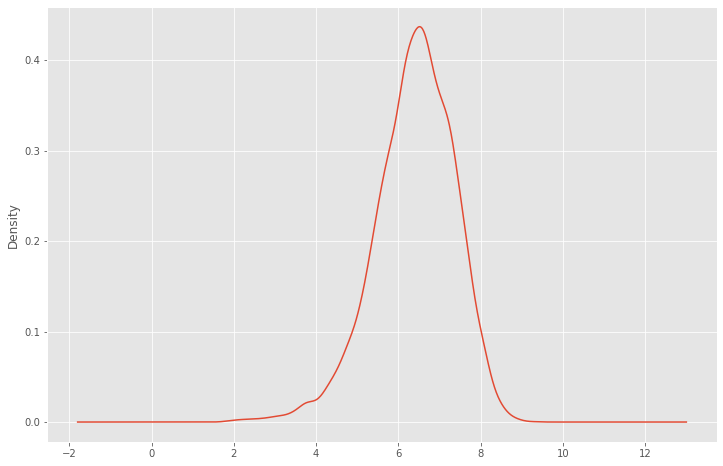

In [46]:
df.score.plot.density();

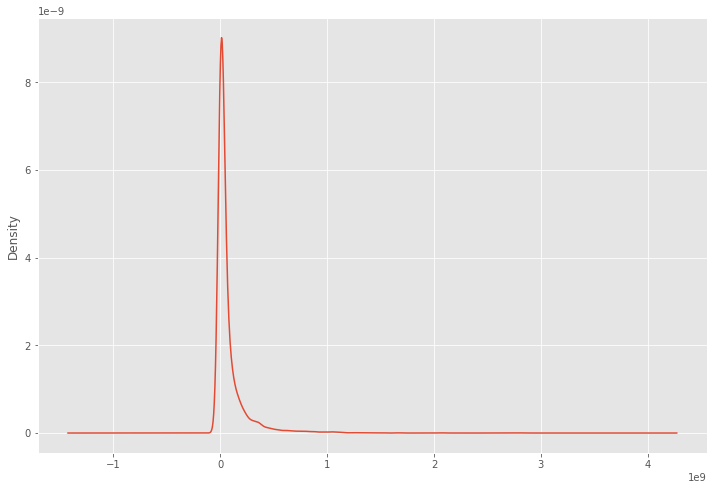

In [48]:
df.gross.plot.density();

### Filling missing values

In [54]:
y = df.replace("", np.nan)

In [51]:
# Handing missing categroical variable
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.
        
        Columns of dtype object are imputed with the most frequent value 
        in column.
        
        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c] for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [55]:
yt = DataFrameImputer().fit_transform(y)

In [63]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
for cols in ['score', 'votes', 'budget', 'gross', 'runtime']:  # here both are quantitative features.
      yt[cols] = impute.fit_transform(yt[[cols]])

In [65]:
yt.head(50)

name rating      genre  year  \
0                                      The Shining      R      Drama  1980   
1                                  The Blue Lagoon      R  Adventure  1980   
2   Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                        Airplane!     PG     Comedy  1980   
4                                       Caddyshack      R     Comedy  1980   
5                                  Friday the 13th      R     Horror  1980   
6                               The Blues Brothers      R     Action  1980   
7                                      Raging Bull      R  Biography  1980   
8                                      Superman II     PG     Action  1980   
9                                  The Long Riders      R  Biography  1980   
10                           Any Which Way You Can     PG     Action  1980   
11                          The Gods Must Be Crazy     PG  Adventure  1980   
12                                          Popeye     PG  Adventure  1980   
13                                 Ordinary People      R      Drama  1980   
14                                 Dressed to Kill      R      Crime  1980   
15                               Somewhere in Time     PG      Drama  1980   
16                                            Fame      R      Drama  1980   
17                                          9 to 5     PG     Comedy  1980   
18                                         The Fog      R     Horror  1980   
19                                      Stir Crazy      R     Comedy  1980   
20                                        Cruising      R      Crime  1980   
21                                   Heaven's Gate      R  Adventure  1980   
22                             The Final Countdown     PG     Action  1980   
23                                          Xanadu     PG    Fantasy  1980   
24                                    Urban Cowboy     PG      Drama  1980   
25                                  Altered States      R     Horror  1980   
26                                 Little Darlings      R     Comedy  1980   
27                               Raise the Titanic     PG     Action  1980   
28                                        Brubaker      R      Crime  1980   
29                                 American Gigolo      R      Crime  1980   
30                                    My Bodyguard     PG     Comedy  1980   
31                                      Prom Night      R     Horror  1980   
32                        Smokey and the Bandit II     PG     Action  1980   
33                Cattle Annie and Little Britches     PG      Drama  1980   
34                            Seems Like Old Times     PG     Comedy  1980   
35                                Private Benjamin      R     Comedy  1980   
36                           The Hollywood Knights      R     Comedy  1980   
37                                      Motel Hell      R     Comedy  1980   
38                                 The Jazz Singer     PG      Drama  1980   
39                           Coal Miner's Daughter     PG  Biography  1980   
40                        The Watcher in the Woods     PG     Family  1980   
41                                  Breaker Morant     PG      Drama  1980   
42                                   The Stunt Man      R     Action  1980   
43                          Where the Buffalo Roam      R  Biography  1980   
44                                   The Awakening      R     Horror  1980   
45                   Cheech and Chong's Next Movie      R     Comedy  1980   
46                                      The Island      R     Action  1980   
47                                  The Boogey Man      R     Horror  1980   
48                                   The Nude Bomb     PG     Action  1980   
49                              Lion of the Desert     PG  Biography  1980   

                              released  score      votes           

In [67]:
# change data type of columns

yt['budget'] = yt['budget'].astype('int64')
yt['gross'] = yt['gross'].astype('int64')

In [70]:
yt.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [98]:
yt['yearcorrect'] = yt['released'].astype(str).str[8:13]

In [99]:
yt.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime yearcorrect  
0   46998772        Warner Bros.    146.0        1980  
1   58853106   Columbia Pictures    104.0       1980   
2  538375067           Lucasfilm    124.0        1980  
3   83453539  Paramount Pictures     88.0       1980   
4   39846344      Orion Pictures     98.0        1980

In [107]:
yt.sort_values(by = ['gross'], inplace=False, ascending=False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [109]:
pd.set_option('display.max_rows', 10)

In [110]:
# Drop any duplicates

yt['company'].drop_duplicates()

0              Warner Bros.
1         Columbia Pictures
2                 Lucasfilm
3        Paramount Pictures
4            Orion Pictures
               ...         
7658           Notis Studio
7660    Abominable Pictures
7661         Dow Jazz Films
7665       Embi Productions
7667            PK 65 Films
Name: company, Length: 2385, dtype: object

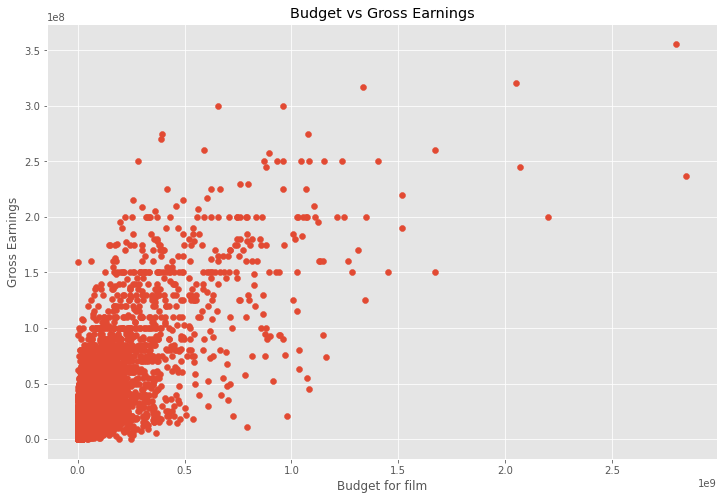

In [113]:
# Scater plot with budget vs gross
plt.scatter(x = yt['gross'], y=yt['budget'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross Earnings')
plt.show()

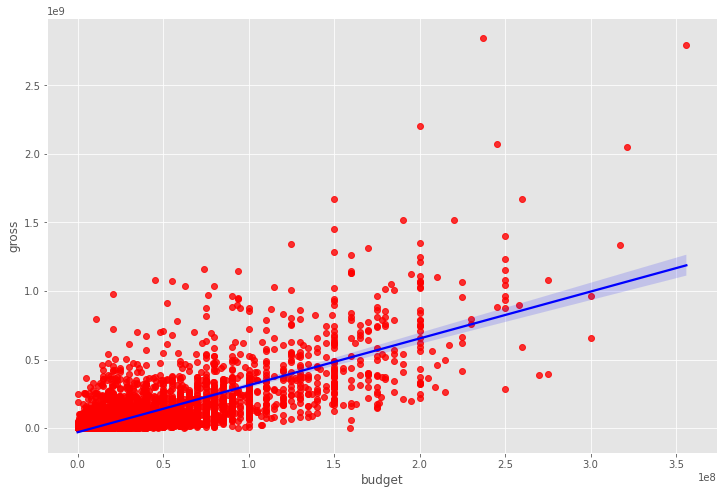

In [117]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data=yt, scatter_kws={'color':'red'}, line_kws={'color':'blue'});

In [119]:
yt.corr(method='pearson')

year     score     votes    budget     gross   runtime
year     1.000000  0.098013  0.222573  0.291690  0.259504  0.120662
score    0.098013  1.000000  0.409157  0.061931  0.185563  0.399407
votes    0.222573  0.409157  1.000000  0.460968  0.632120  0.309151
budget   0.291690  0.061931  0.460968  1.000000  0.745881  0.273371
gross    0.259504  0.185563  0.632120  0.745881  1.000000  0.244380
runtime  0.120662  0.399407  0.309151  0.273371  0.244380  1.000000

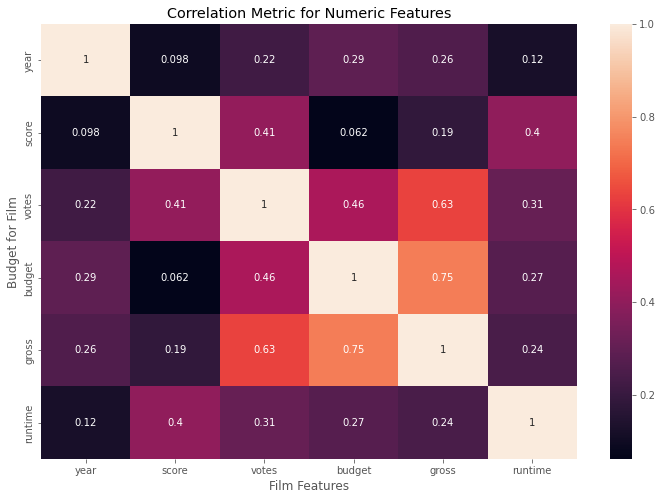

In [121]:
correlation_matrix = yt.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Film Features')
plt.ylabel('Budget for Film')
plt.show()

In [122]:
yt_numeric = yt

for col_name in yt_numeric.columns:
    if(yt_numeric[col_name].dtype == 'object'):
        yt_numeric[col_name] = yt_numeric[col_name].astype('category')
        yt_numeric[col_name] = yt_numeric[col_name].cat.codes
yt_numeric        

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
...    ...     ...    ...   ...       ...    ...        ...       ...     ...   
7663  3705       6      6  2020      2964    3.1       18.0      1500    2289   
7664  1678       6      4  2020      1107    4.7       36.0       774    2614   
7665  4717       6      6  2020       193    5.7       29.0      2061    2683   
7666  2843       6      6  2020      2817    6.5    33000.0      1184    1824   
7667  5394       6     10  2020       391    5.7        7.0      2165    3344   

      star  country    budget      gross  company  runtime  yearcorrect  
0     1047       54  19000000   46998772     2319    146.0           13  
1      327       55   4500000   58853106      731    104.0          133  
2     1745       55  18000000  538375067     1540    124.0           13  
3     2246       55   3500000   83453539     1812     88.0          133  
4      410       55   6000000   39846344     1777     98.0           13  
...    ...      ...       ...        ...      ...      ...          ...  
7663  2421       55      7000   20205757     2281     90.0          184  
7664  1886       55  20500000   20205757      539     90.0           77  
7665  2040       55     58750   20205757      941    104.0           86  
7666   450       55     15000   20205757     2281    120.0          112  
7667  2463       44  20500000   20205757     1787    102.0          219  

[7668 rows x 16 columns]

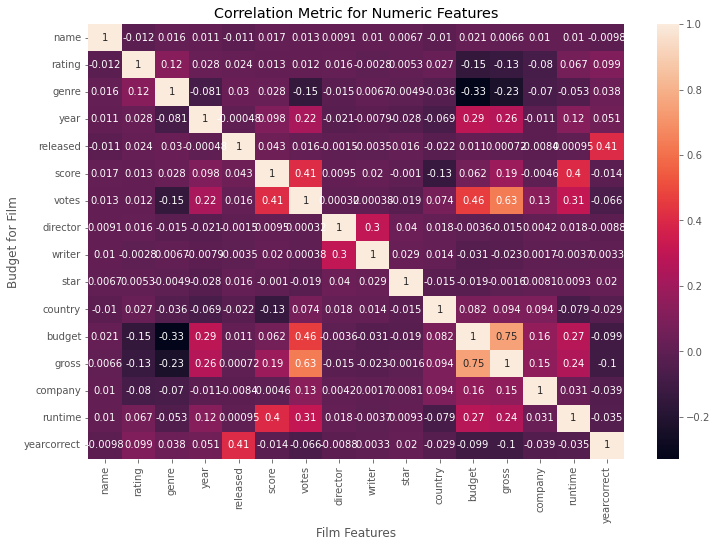

In [123]:
correlation_matrix = yt_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Metric for Numeric Features')
plt.xlabel('Film Features')
plt.ylabel('Budget for Film')
plt.show()

In [124]:
yt_numeric.corr()

name    rating     genre      year  released     score  \
name         1.000000 -0.012441  0.016355  0.011453 -0.011087  0.017105   
rating      -0.012441  1.000000  0.123465  0.027931  0.023643  0.013276   
genre        0.016355  0.123465  1.000000 -0.081261  0.029997  0.027965   
year         0.011453  0.027931 -0.081261  1.000000 -0.000484  0.098013   
released    -0.011087  0.023643  0.029997 -0.000484  1.000000  0.042662   
...               ...       ...       ...       ...       ...       ...   
budget       0.020921 -0.148543 -0.328484  0.291690  0.011049  0.061931   
gross        0.006601 -0.130478 -0.233385  0.259504  0.000721  0.185563   
company      0.010369 -0.079626 -0.070013 -0.011438 -0.008443 -0.004570   
runtime      0.010335  0.066597 -0.052719  0.120662  0.000947  0.399407   
yearcorrect -0.009807  0.098573  0.038487  0.050772  0.406609 -0.014148   

                votes  director    writer      star   country    budget  \
name         0.013056  0.009079  0.010018  0.006749 -0.010425  0.020921   
rating       0.012286  0.016255 -0.002795  0.005314  0.026930 -0.148543   
genre       -0.145291 -0.015258  0.006746 -0.004856 -0.035896 -0.328484   
year         0.222573 -0.020795 -0.007901 -0.027745 -0.069423  0.291690   
released     0.015980 -0.001492 -0.003461  0.015550 -0.022042  0.011049   
...               ...       ...       ...       ...       ...       ...   
budget       0.460968 -0.003584 -0.031050 -0.018814  0.081816  1.000000   
gross        0.632120 -0.014758 -0.023028 -0.001640  0.093622  0.745881   
company      0.130562  0.004250  0.001665  0.008072  0.094210  0.164213   
runtime      0.309151  0.017611 -0.003715  0.009253 -0.079305  0.273371   
yearcorrect -0.066142 -0.008825  0.003269  0.019803 -0.029118 -0.099348   

                gross   company   runtime  yearcorrect  
name         0.006601  0.010369  0.010335    -0.009807  
rating      -0.130478 -0.079626  0.066597     0.098573  
genre       -0.233385 -0.070013 -0.052719     0.038487  
year         0.259504 -0.011438  0.120662     0.050772  
released     0.000721 -0.008443  0.000947     0.406609  
...               ...       ...       ...          ...  
budget       0.745881  0.164213  0.273371    -0.099348  
gross        1.000000  0.153347  0.244380    -0.102519  
company      0.153347  1.000000  0.030999    -0.038919  
runtime      0.244380  0.030999  1.000000    -0.035417  
yearcorrect -0.102519 -0.038919 -0.035417     1.000000  

[16 rows x 16 columns]

In [125]:
correlation_mat = yt_numeric.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs

name         name           1.000000
             rating        -0.012441
             genre          0.016355
             year           0.011453
             released      -0.011087
                              ...   
yearcorrect  budget        -0.099348
             gross         -0.102519
             company       -0.038919
             runtime       -0.035417
             yearcorrect    1.000000
Length: 256, dtype: float64

In [127]:
sorted_pairs = corr_pairs.sort_values()

In [128]:
high_correlation = sorted_pairs[(sorted_pairs) > 0.5]
high_correlation

votes        gross          0.632120
gross        votes          0.632120
budget       gross          0.745881
gross        budget         0.745881
name         name           1.000000
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 20, dtype: float64